In [1]:
import os
import yaml

import numpy as np
import pandas as pd

import zarr

from utils.utility_functions import (
    LBP, ORB, FFT, STD, MSE, SSIM, kl_divergence, u_stats, hsd, compare_clusters, plot
)

In [2]:
# Specify cluster pairs
pairs = [(12, 15)]

In [3]:
# Paths and input
out = os.path.join(os.getcwd(), f'output/img_similarity')
if not os.path.exists(out):
    os.makedirs(out)

# Read single-cell sample for VAE analysis
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))
vae_clusters = main

# Read image contrast settings for CRC-097 (defined earlier in CyLinter)
if os.path.exists(os.path.join(os.getcwd(), 'input/CRC-097_cylinter_contrast_limits.yml')):
    contrast_limits = yaml.safe_load(
        open(os.path.join(os.getcwd(), 'input/CRC-097_cylinter_contrast_limits.yml'))
    )

# Channel mappings in OME-TIFF
markers = {
    0: 'CD3e', 1: 'CD45RO', 2: 'Keratin', 3: 'aSMA', 4: 'CD4', 5: 'CD45',
    6: 'PD1', 7: 'CD20', 8: 'CD68', 9: 'CD8a', 10: 'CD163', 11: 'FOXP3',
    12: 'PD-L1', 13: 'ECAD', 14: 'Vimentin', 15: 'CDX2', 16: 'LaminABC',
    17: 'Desmin', 18: 'CD31', 19: 'PCNA', 20: 'CollagenIV'
}

# Read combined training, validation, and test thumbnails
root = os.path.join(os.getcwd(), 'input/VAE20/6_latent_space_LD850')
combo_dir = os.path.join(root, 'combined_zarr')
X_combo = zarr.open(combo_dir)

# load data
X_combo = X_combo[:]

print()
for clus_pair in pairs:

    print(clus_pair)

    combo_name = f'{clus_pair[0]}v{clus_pair[1]}'

    save_dir = os.path.join(out, combo_name)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Get positional indices of clustering cells (aligned with X_combo)
    clus1 = vae_clusters.index[vae_clusters['VAE20'] == clus_pair[0]]
    clus2 = vae_clusters.index[vae_clusters['VAE20'] == clus_pair[1]]

    # Apply cutoff on median pixel intensity among image channels to determine
    # which markers are expressed by cells in both clusters
    # also assigns X-axis index for plotting
    expressed_channels = {}
    idx = 0
    for ch in range(X_combo.shape[0]):
        imgs1 = X_combo[ch, clus1]
        imgs2 = X_combo[ch, clus2]
        if (np.median(imgs1) > 0) and (np.median(imgs2) > 0):
            expressed_channels[ch] = (markers[ch], idx)
            idx += 1

    # Select number of images from the larger cluster equal to smaller cluster
    # sample_size = min(len(clus1), len(clus2))
    # clus1 = clus1[0:sample_size]
    # clus2 = clus2[0:sample_size]

    clus1 = clus1[0:500]
    clus2 = clus2[0:500]


(12, 15)



Computing MSE for Cluster: 12, Channel: CD3e


100%|███████████████████████████████████| 124750/124750 [01:36<00:00, 1287.49it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD3e


100%|███████████████████████████████████| 124750/124750 [01:24<00:00, 1483.46it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:308: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, channel_df], axis=0)



Computing MSE for Cluster: 12, Channel: CD45


100%|███████████████████████████████████| 124750/124750 [01:24<00:00, 1470.77it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD45


100%|███████████████████████████████████| 124750/124750 [01:06<00:00, 1868.32it/s]



Computing MSE for Cluster: 12, Channel: CD8a


100%|███████████████████████████████████| 124750/124750 [01:01<00:00, 2025.06it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: CD8a


100%|███████████████████████████████████| 124750/124750 [01:43<00:00, 1208.80it/s]



Computing MSE for Cluster: 12, Channel: PCNA


100%|███████████████████████████████████| 124750/124750 [01:13<00:00, 1695.44it/s]
/Users/greg/projects/vae-paper/src/utils/utility_functions.py:266: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  channel_df = pd.concat([channel_df, cluster_df], axis=0)


Computing MSE for Cluster: 15, Channel: PCNA


100%|███████████████████████████████████| 124750/124750 [01:12<00:00, 1712.65it/s]



Computing MSE across clusters 12v15 for channel: CD3e


100%|███████████████████████████████████████████| 500/500 [03:42<00:00,  2.25it/s]


Computing MSE across clusters 12v15 for channel: CD45


100%|███████████████████████████████████████████| 500/500 [03:23<00:00,  2.46it/s]


Computing MSE across clusters 12v15 for channel: CD8a


100%|███████████████████████████████████████████| 500/500 [02:41<00:00,  3.09it/s]


Computing MSE across clusters 12v15 for channel: PCNA


100%|███████████████████████████████████████████| 500/500 [02:08<00:00,  3.90it/s]



MSE U-stats:
            u-stat  pval  plot_ch
CD3e  2.771975e+09   0.0        0
CD45  6.390740e+09   0.0        1
CD8a  7.201772e+09   0.0        2
PCNA  1.222691e+10   0.0        3



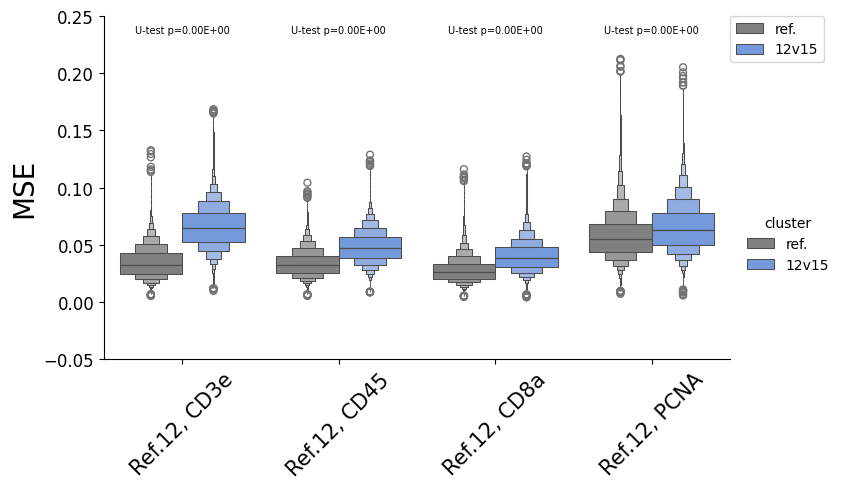

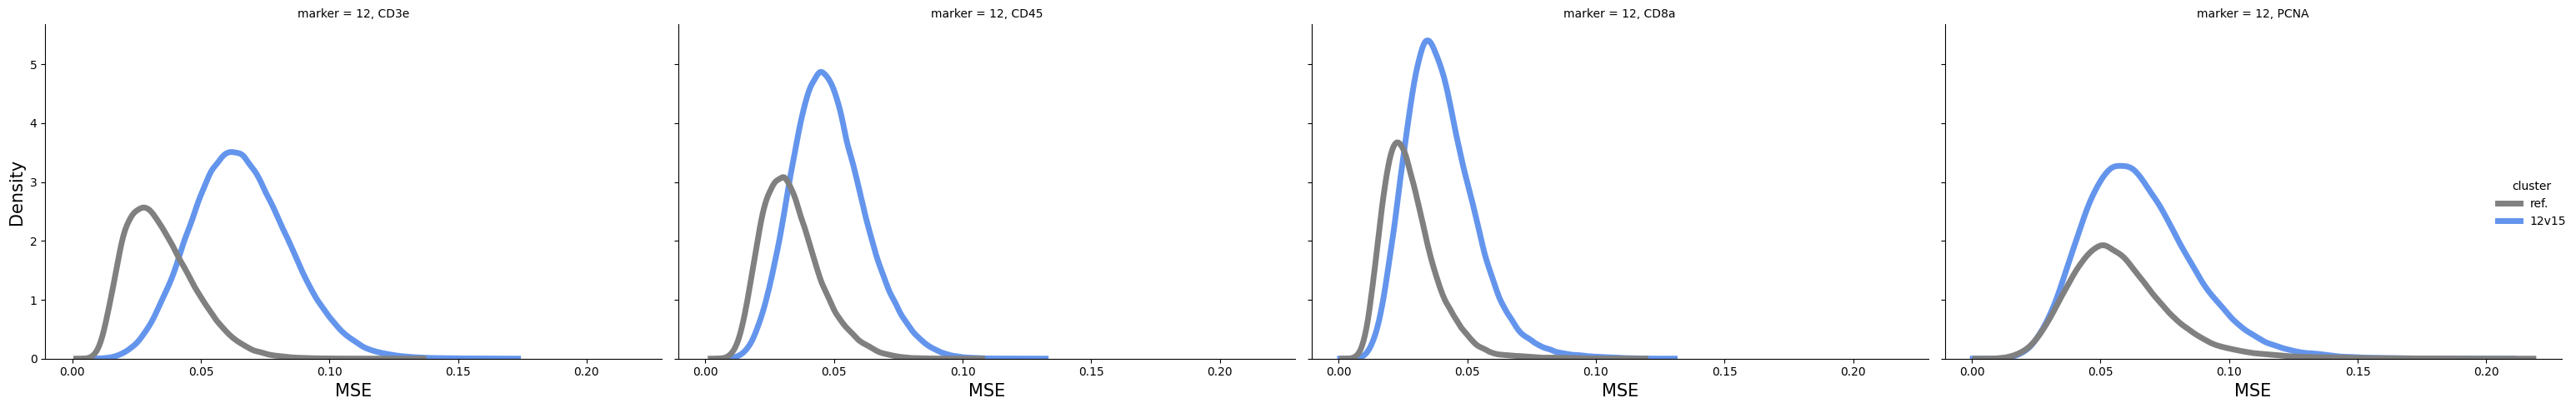

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


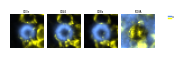

In [4]:
expressed_channels = {0: ('CD3e', 0), 5: ('CD45', 1), 9: ('CD8a', 2), 19: ('PCNA', 3)}

for color, metric in zip(['cornflowerblue'], ['MSE']):

    df, cluster_select, sq_err = compare_clusters(
        clus1_name=clus_pair[0], clus1=clus1, clus1_ids=clus1,
        clus2_name=clus_pair[1], clus2=clus2, clus2_ids=clus2,
        metric=metric, expressed_channels=expressed_channels,
        markers=markers, X_combo=X_combo, combo_name=combo_name,
        save_dir=save_dir
    )

    # Save dataframe with metric values
    df.reset_index(drop=True, inplace=True)
    df.to_csv(os.path.join(save_dir, f'{metric}.csv'), index=False)

    # Create dataframe of stored t-test stats
    stats = u_stats(
        df=df, metric=metric, cluster_select=cluster_select,
        expressed_channels=expressed_channels, markers=markers,
        combo_name=combo_name
    )

    # Compute one-way ANOVA and Tukey HSD stats
    # hsds = hsd(df=df, metric=metric)

    # Plot metric data
    plot(
        df=df, metric=metric, stats=stats, color=color, sq_err=sq_err,
        combo_name=combo_name, clus_pair=clus_pair, save_dir=save_dir
    )